In [70]:
# Calculate different clustering methods
import networkx as nx
import pandas as pd
from networkx.algorithms.centrality import edge_betweenness_centrality

G = nx.read_graphml("network.graphml")
threshold = 0.294

# Create a filtered graph
filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] > threshold]

network = nx.Graph()
network.add_nodes_from(G.nodes())
network.add_edges_from(filtered_edges)

# Clustering analysis


In [71]:

from collections import defaultdict

# Get different clustering partitions
louvain_communities = nx.community.louvain_communities(network)
#label_propagation = nx.community.label_propagation_communities(network)
#greedy_modularity = nx.community.greedy_modularity_communities(network)
#girvan_newman = nx.community.girvan_newman(network)
#edge_betweenness_centrality = nx.community.edge_betweenness_centrality(network, 3)



# Create a dictionary to store clusters and their nodes
clustering_results = {
    'louvain': list(louvain_communities),
    #'label_propagation': list(label_propagation),
    #'greedy_modularity': list(greedy_modularity),
    #"greedy_modularity": list(greedy_modularity),
    #"girvan_newman": list(girvan_newman),
    #"edge_betweenness_centrality": edge_betweenness_centrality
}



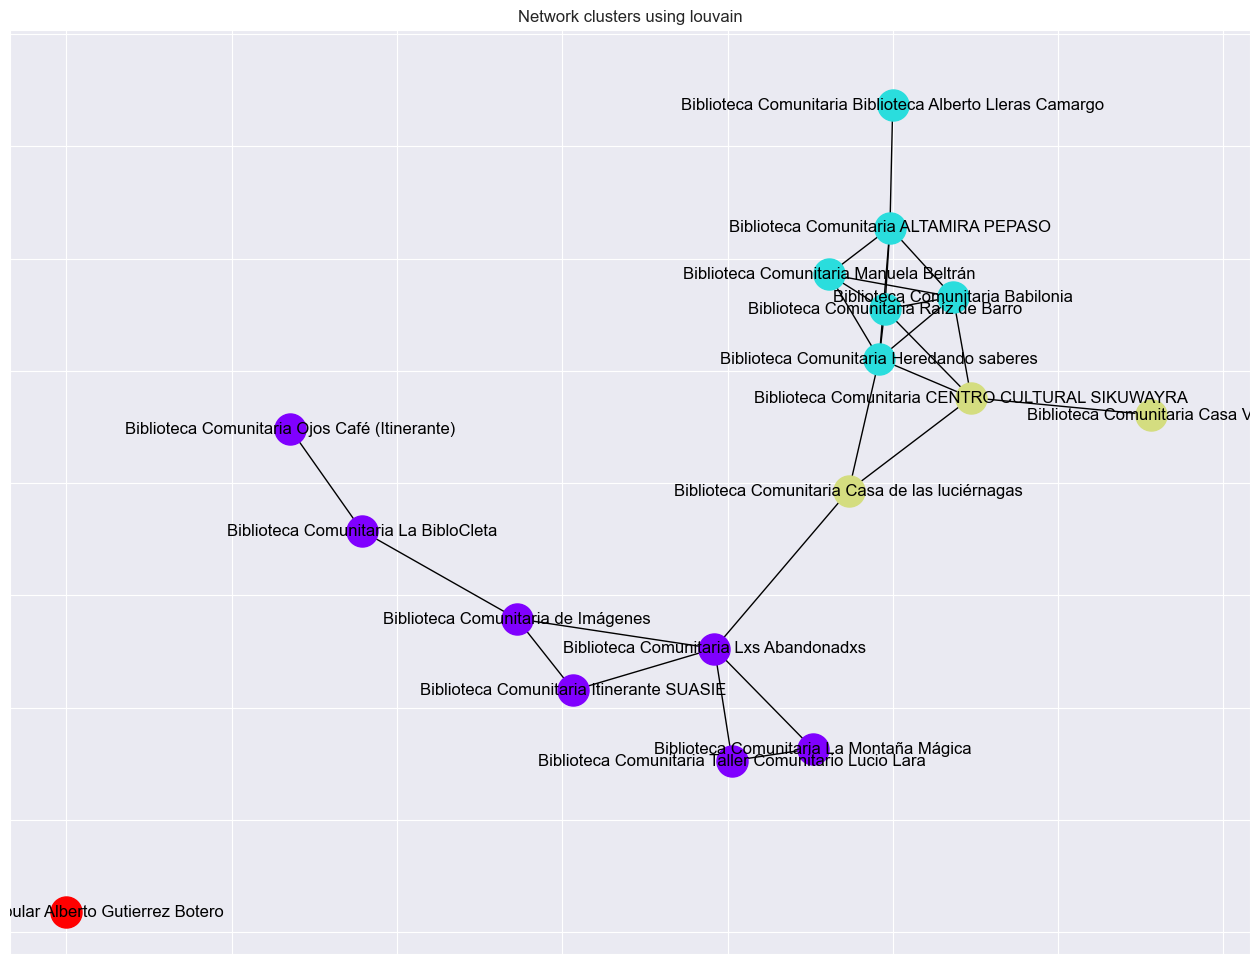

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def draw_clustered_network(G, clusters, title):
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G)

    # Assign colors to clusters
    colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))

    for cluster, color in zip(clusters, colors):
        nx.draw_networkx_nodes(G, pos,
                               nodelist=cluster,
                               node_color=[color],
                               node_size=500)

    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.title(title)
    plt.show()

df = pd.read_csv("..\output\\results.csv")


# Visualize each clustering method
for method, clusters in clustering_results.items():
    draw_clustered_network(network, clusters, f'Network clusters using {method}')


In [73]:
PROMPT = """You are tasked with writing a short description in markdown for each category based on survey data collected from a cluster of libraries. Your goal is to provide concise, objective insights for each analysis category in markdown.

First, here are the analysis categories and their descriptions:

<analysis_categories>
**Categoría de análisis: Nivel de avance en la digitalización del catálogo**


2. **Coordenada:** Estado de la digitalización del catálogo
   - **Descripción:** Nivel de desarrollo en la digitalización del catálogo bibliográfico
   - **Recopilado por nosotros (Pregunta):** ¿Qué tipo de catálogo se ha desarrollado en la biblioteca comunitaria?

3. **Coordenada:** % Colección ingresada al catálogo
   - **Descripción:** Porcentaje de la colección bibliográfica que ha sido catalogada aproximadamente
   - **Recopilado por nosotros (Pregunta):** ¿Qué porcentaje de la colección ha sido ingresada al catálogo aproximadamente?

4. **Coordenada:** Nivel de información capturada en el catálogo
   - **Descripción:** Detalle de la información capturada en el catálogo
   - **Recopilado por nosotros (Pregunta):** ¿Qué nivel de detalle tiene la información registrada en el catálogo?

---

**Categoría de análisis: Nivel de avance en la sistematización de servicios bibliotecarios**

1. **Coordenada:** Sistemas de clasificación
   - **Descripción:** Sistemas usados para la organización de las colecciones
   - **Recopilado por nosotros (Pregunta):** ¿Qué sistema de clasificación usa en la colección?

2. **Coordenada:** Nivel de detalle en la organización de la colección
   - **Descripción:** Nivel de organización de la colección en la biblioteca
   - **Recopilado por nosotros (Pregunta):** ¿Cómo se identifica la ubicación de los libros en la colección?

3. **Coordenada:** Tiempo que le toma hallar un libro
   - **Descripción:** Tiempo que toma encontrar un libro en la biblioteca
   - **Recopilado por nosotros (Pregunta):** ¿Cuánto tiempo en promedio tarda en encontrar un libro?

4. **Coordenada:** Sistema de registro de usuarios
   - **Descripción:** -
   - **Recopilado por nosotros (Pregunta):** ¿Cuenta con sistema de registro de usuarios?

5. **Coordenada:** Reglamento de servicios
   - **Descripción:** -
   - **Recopilado por nosotros (Pregunta):** ¿Existe un reglamento de servicios?

6. **Coordenada:** Sistematización en préstamo externo
   - **Descripción:** Nivel de sistematización en el proceso de préstamo de la biblioteca
   - **Recopilado por nosotros (Pregunta):** ¿Cómo se gestionan los préstamos externos de la colección?

---

**Categoría de análisis: Caracterización de la colección**

1. **Coordenada:** Tipos de colecciones
   - **Descripción:** Tipos de colección disponibles en la biblioteca
   - **Recopilado por nosotros (Pregunta):** -

2. **Coordenada:** Cantidad de material bibliográfico
   - **Descripción:** Número total de material bibliográfico en la colección
   - **Recopilado por nosotros (Pregunta):** -

3. **Coordenada:** Percepción del estado físico de la colección
   - **Descripción:** Percepción del estado de conservación de la colección
   - **Recopilado por nosotros (Pregunta):** ¿Cuál es su percepción general del estado de conservación de la colección?

4. **Coordenada:** Enfoques de las colecciones
   - **Descripción:** Calculada a partir de las respuestas múltiples de temas de las colecciones en las bibliotecas (si contesta un tema entonces es muy especializada, si contesta todos los temas no es especializada)
   - **Recopilado por nosotros (Pregunta):** ¿Las colecciones en su biblioteca tienen un enfoque en particular?

5. **Coordenada:** Actividades de mediación con la colección
   - **Descripción:** -
   - **Recopilado por nosotros (Pregunta):** ¿En cuáles actividades de mediación usas la colección?

6. **Coordenada:** Frecuencia actividades de mediación con la colección
   - **Descripción:** Frecuencia de mediación de lectura de las colecciones
   - **Recopilado por nosotros (Pregunta):** ¿Con qué frecuencia se usa la colección en actividades de mediación?

7. **Coordenada:** Colecciones especiales
   - **Descripción:** Presencia de colecciones especializadas o poco comunes
   - **Recopilado por nosotros (Pregunta):** ¿La biblioteca cuenta con colecciones de valor patrimonial?
</analysis_categories>

Now, here is the survey data collected from the libraries:

<survey_data>
{SURVEY_DATA}
</survey_data>

To complete this task, follow these steps:

1. Review the survey data carefully, focusing on the information relevant to each analysis category.

2. For each category, write a brief analysis (2-3 sentences) that summarizes the key findings or trends observed in the data, dont make conclusions.

3. Present your description in the following format:

<description>
<category>[Category name]</category>
<summary>[Your 2-3 sentence analysis here]</summary>
</description>

4. Write using markdown to bold important concepts and put titles


Remember to focus on providing insights that would be valuable for understanding the current state and potential areas for improvement in these libraries. Avoid making assumptions or drawing conclusions beyond what is directly supported by the data.

Present your complete description, covering only categories not coordinates, in your response."""

In [74]:

# Analysis of Clusters
clustering_results
df_encuestas = pd.read_csv("../data/Formulario sobre coordenadas de análisis para el mapeo de colecciones en bibliotecas comunitarias de Bogotá (Respuestas) - Normalización Respuestas.csv")

# Explicación de los clusters
import openai

client = openai.OpenAI()


# Supongamos que ya tienes df_encuestas y df_categorias cargados

def construir_prompt(df_cluster):

    return PROMPT.format(SURVEY_DATA=df_cluster.to_string())


def analizar_cluster(cluster, df_surveys):
    # Filter the libraries in the cluster
    libraries = list(cluster)
    df_cluster = df_surveys[df_surveys['Nombre de la biblioteca comunitaria'].isin(libraries)]

    # Build the prompt
    prompt = construir_prompt(df_cluster)

    # Call the OpenAI API
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "Eres un analista de datos especializado en bibliotecas comunitarias."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
    )

    # Extract the analysis
    analysis = response.choices[0].message.content.strip()
    return analysis


clusters = clustering_results
analisis = []
for algoritmo, lista_clusters in clusters.items():
    print(f"Análisis para el algoritmo: {algoritmo}\n")
    for idx, cluster in enumerate(lista_clusters):
        analisis.append(analizar_cluster(cluster, df_encuestas))
        print(f"Cluster {idx + 1}:\nProcesado\n")
    break

Análisis para el algoritmo: louvain

Cluster 1:
Procesado

Cluster 2:
Procesado

Cluster 3:
Procesado

Cluster 4:
Procesado



In [75]:
from IPython.display import display, Markdown, Latex
string_analysis = ""
for i, text in enumerate(analisis):
    string_analysis += f"Cluster: {i+1}\n"
    string_analysis += f"Bibliotecas\n {lista_clusters[i]}\n"
    string_analysis += analisis[i] + "\n"

display(Markdown(string_analysis))

Cluster: 1
Bibliotecas
 {'Biblioteca Comunitaria La Montaña Mágica', 'Biblioteca Comunitaria de Imágenes', 'Biblioteca Comunitaria Taller Comunitario Lucio Lara', 'Biblioteca Comunitaria Ojos Café (Itinerante)', 'Biblioteca Comunitaria La BibloCleta', 'Biblioteca Comunitaria Itinerante SUASIE', 'Biblioteca Comunitaria Lxs Abandonadxs'}
```markdown
<description>
<category>**Nivel de avance en la digitalización del catálogo**</category>
<summary>La mayoría de las bibliotecas comunitarias encuestadas tienen un **nivel bajo de digitalización** del catálogo, con varias que todavía no tienen un catálogo formal establecido. Solo una biblioteca reportó tener un catálogo en hoja de cálculo, lo que indica una etapa inicial de digitalización. El nivel de detalle de la información en los catálogos existentes varía, pero en general es limitado.</summary>
</description>

<description>
<category>**Nivel de avance en la sistematización de servicios bibliotecarios**</category>
<summary>Las bibliotecas exhiben **diversidad en los sistemas de clasificación**, aunque algunas no utilizan ningún sistema formal. El tiempo promedio para encontrar un libro varía, pero generalmente toma entre 5 a 20 minutos. La mayoría de las bibliotecas no tienen un sistema de registro de usuarios ni reglamento de servicios formalizado, lo que sugiere un **nivel bajo de sistematización**.</summary>
</description>

<description>
<category>**Caracterización de la colección**</category>
<summary>Las colecciones de las bibliotecas comunitarias presentan una **amplia variedad de temas**, incluyendo literatura, derechos humanos, y arte, con un enfoque particular en creaciones locales y patrimonio cultural. La percepción general del estado físico de las colecciones es positiva, aunque algunas requieren atención. Las actividades de mediación son frecuentes y diversas, aunque algunas bibliotecas están en proceso de organización y aún no las han implementado.</summary>
</description>
```
Cluster: 2
Bibliotecas
 {'Biblioteca Comunitaria Babilonia', 'Biblioteca Comunitaria Biblioteca Alberto Lleras Camargo', 'Biblioteca Comunitaria Raíz de Barro', 'Biblioteca Comunitaria Manuela Beltrán', 'Biblioteca Comunitaria Heredando saberes', 'Biblioteca Comunitaria ALTAMIRA PEPASO'}
```markdown
<description>
<category>**Nivel de avance en la digitalización del catálogo**</category>
<summary>La mayoría de las bibliotecas comunitarias utilizan un **catálogo en hoja de cálculo**, con solo una biblioteca utilizando **software bibliográfico**. El **porcentaje de la colección ingresada al catálogo** varía considerablemente, con algunas bibliotecas alcanzando el 100% y otras alrededor del 50-70%. La **información capturada** en los catálogos varía desde descripciones básicas hasta el estado de disponibilidad de los materiales.</summary>
</description>

<description>
<category>**Nivel de avance en la sistematización de servicios bibliotecarios**</category>
<summary>Los **sistemas de clasificación** empleados son variados, destacándose el uso del **sistema de clasificación decimal de Dewey** y el **sistema de clasificación facetada**. La **organización de las colecciones** se realiza mediante códigos simples o secciones etiquetadas, y el tiempo promedio para encontrar un libro varía entre 5 y 20 minutos. La **sistematización del préstamo externo** es limitada, con varias bibliotecas indicando **préstamos sin registro**.</summary>
</description>

<description>
<category>**Caracterización de la colección**</category>
<summary>La **variedad de colecciones** incluye temas como **ciencia, literatura, infantil, y derechos humanos**. La mayoría de los materiales están bien conservados, aunque algunos requieren atención. Las **actividades de mediación** son frecuentes y varias bibliotecas cuentan con **colecciones de valor patrimonial**, como **creaciones locales** o **libros de recuperación de la memoria**.</summary>
</description>
```
Cluster: 3
Bibliotecas
 {'Biblioteca Comunitaria Casa Viva', 'Biblioteca Comunitaria CENTRO CULTURAL SIKUWAYRA', 'Biblioteca Comunitaria Casa de las luciérnagas'}
```markdown
<description>
<category>**Nivel de avance en la digitalización del catálogo**</category>
<summary>Los datos revelan que las bibliotecas comunitarias utilizan una variedad de métodos para la digitalización del catálogo, desde software bibliográfico hasta hojas de cálculo, y una biblioteca aún no tiene un catálogo digitalizado. El porcentaje de la colección ingresada varía significativamente entre las bibliotecas, con cifras que van desde el 0% hasta el 40%, indicando diferentes niveles de avance en el proceso de digitalización.</summary>
</description>

<description>
<category>**Nivel de avance en la sistematización de servicios bibliotecarios**</category>
<summary>Las bibliotecas emplean diversos sistemas de clasificación, como el sistema decimal de Dewey y el sistema facetado, lo que refleja una diversidad en la organización de las colecciones. El tiempo promedio para encontrar un libro es generalmente corto, alrededor de 5 minutos, sugiriendo una organización eficiente. Además, el uso de sistemas de registro de usuarios varía, con algunas bibliotecas utilizando software y otras hojas de cálculo.</summary>
</description>

<description>
<category>**Caracterización de la colección**</category>
<summary>Las colecciones en las bibliotecas comunitarias presentan una diversidad de enfoques, desde infantiles y pedagógicos hasta temas de memoria local. La percepción del estado físico de las colecciones es generalmente positiva, aunque se reconoce que algunos materiales requieren atención. Además, se observa una participación activa en actividades de mediación, con un uso frecuente de las colecciones en estas actividades.</summary>
</description>
```
Cluster: 4
Bibliotecas
 {'Biblioteca popular Alberto Gutierrez Botero'}
```markdown
<description>
<category>**Nivel de avance en la digitalización del catálogo**</category>
<summary>La biblioteca ha desarrollado un **catálogo en hoja de cálculo**, y **el 100% de la colección** ha sido ingresada al catálogo. La información registrada en el catálogo incluye el **estado de disponibilidad de los materiales**, indicando un buen nivel de detalle en la digitalización del catálogo.</summary>
</description>

<description>
<category>**Nivel de avance en la sistematización de servicios bibliotecarios**</category>
<summary>Se utiliza el **sistema de clasificación decimal de Dewey y clasificación de Cutter** para organizar la colección, y la ubicación de los libros es identificable mediante un sistema detallado. Encontrar un libro toma aproximadamente **5 minutos**, y los usuarios están registrados en hojas de cálculo. Existe un **reglamento difundido** y los préstamos externos se gestionan también mediante hojas de cálculo.</summary>
</description>

<description>
<category>**Caracterización de la colección**</category>
<summary>La colección abarca un amplio rango de temas como **Literatura, Arte, Ciencia, Infantil y Poesía**, y se encuentra en **excelentes condiciones físicas**. Las actividades de mediación incluyen **talleres de escritura y círculos de lectura**, y se realizan con **frecuencia constante**. Además, la biblioteca cuenta con **colecciones de valor patrimonial**.</summary>
</description>
```


In [76]:
response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "Eres un poeta y analista de las bibliotecas comunitarias"},
            {"role": "user", "content": "Escribe un resumen para cada cluster notando las similaridades" + string_analysis}
        ],
        temperature=0.7,
    )

display(Markdown(response.choices[0].message.content.strip()))

### Cluster 1: Bibliotecas Comunitarias con Digitalización y Sistematización Inicial

**Similitudes:**
- **Digitalización del Catálogo:** Las bibliotecas en este clúster tienen un nivel bajo de digitalización, con la mayoría aún sin un catálogo formal o en etapas muy iniciales de digitalización, utilizando principalmente hojas de cálculo.
- **Sistematización de Servicios:** Exhiben diversidad en la clasificación, pero muchas carecen de sistemas formales o registros de usuarios. El tiempo para encontrar un libro varía, pero la falta de sistematización es común.
- **Colección:** Las colecciones son diversas, con un enfoque en temas locales y culturales. Las actividades de mediación son frecuentes, aunque algunas bibliotecas están en proceso de organización.

### Cluster 2: Bibliotecas Comunitarias con Avances Moderados en Digitalización

**Similitudes:**
- **Digitalización del Catálogo:** Utilizan principalmente hojas de cálculo para la digitalización, con algunas bibliotecas alcanzando el 100% de ingreso de la colección. Sin embargo, el uso de software bibliográfico es limitado.
- **Sistematización de Servicios:** Emplean sistemas variados, destacando el uso del sistema decimal de Dewey. El tiempo para localizar libros varía, y los préstamos externos suelen ser informales.
- **Colección:** La variedad temática es amplia y las condiciones físicas son generalmente buenas. Las actividades de mediación son comunes, con un énfasis en colecciones de valor patrimonial.

### Cluster 3: Bibliotecas Comunitarias con Diversidad en Métodos de Digitalización

**Similitudes:**
- **Digitalización del Catálogo:** Hay diversidad en los métodos, desde software hasta hojas de cálculo, con algunas bibliotecas aún sin digitalizar. El avance en digitalización varía significativamente.
- **Sistematización de Servicios:** Utilizan diversos sistemas de clasificación y el tiempo para encontrar un libro es generalmente corto, sugiriendo eficiencia en la organización. Los registros de usuarios también varían en su nivel de sistematización.
- **Colección:** Presentan una diversidad temática, con un enfoque en memoria local. Las condiciones físicas son positivas, y las actividades de mediación son activas y frecuentes.

### Cluster 4: Biblioteca con Alta Digitalización y Sistematización

**Similitudes:**
- **Digitalización del Catálogo:** Esta biblioteca destaca por tener el 100% de su colección digitalizada en hojas de cálculo, con un alto nivel de detalle.
- **Sistematización de Servicios:** Utiliza un sistema de clasificación detallado y eficiente, con un reglamento formal y registros de usuarios y préstamos bien establecidos.
- **Colección:** Ofrece una amplia gama de temas y mantiene sus colecciones en excelentes condiciones. Las actividades de mediación son constantes y variadas, con colecciones de valor patrimonial. 

En resumen, cada clúster refleja diferentes niveles de avance en la digitalización y sistematización de servicios, con un enfoque común en ofrecer colecciones variadas y actividades de mediación que fomentan la participación comunitaria.